In [3]:
pip install keras


   ---------------------------------------- 0.0/1.2 MB ? eta -:--:--
   ----------------- ---------------------- 0.5/1.2 MB 3.4 MB/s eta 0:00:01
   ---------------------------------------- 1.2/1.2 MB 4.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install tensorflow


   ---------------------------------------- 0.0/390.3 MB ? eta -:--:--
   ---------------------------------------- 0.3/390.3 MB ? eta -:--:--
   ---------------------------------------- 1.6/390.3 MB 6.5 MB/s eta 0:01:01
   ---------------------------------------- 3.1/390.3 MB 7.7 MB/s eta 0:00:51
    --------------------------------------- 6.6/390.3 MB 9.4 MB/s eta 0:00:41
    --------------------------------------- 9.2/390.3 MB 10.0 MB/s eta 0:00:39
   - -------------------------------------- 11.5/390.3 MB 10.3 MB/s eta 0:00:37
   - -------------------------------------- 13.9/390.3 MB 10.5 MB/s eta 0:00:36
   - -------------------------------------- 16.3/390.3 MB 10.8 MB/s eta 0:00:35
   - -------------------------------------- 18.9/390.3 MB 10.9 MB/s eta 0:00:34
   -- ------------------------------------- 21.5/390.3 MB 11.0 MB/s eta 0:00:34
   -- ------------------------------------- 23.9/390.3 MB 11.1 MB/s eta 0:00:34
   -- ------------------------------------- 26.5/390.3 MB 11.1 MB

In [9]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
import numpy as np

# Load the dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Check the shape of the data
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 6us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 570ms/step


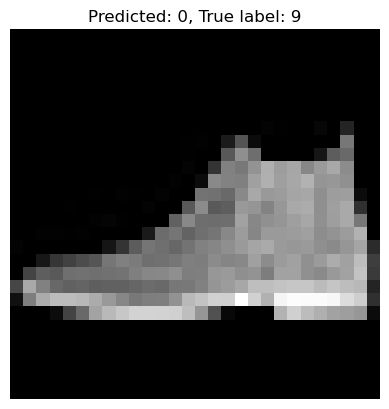

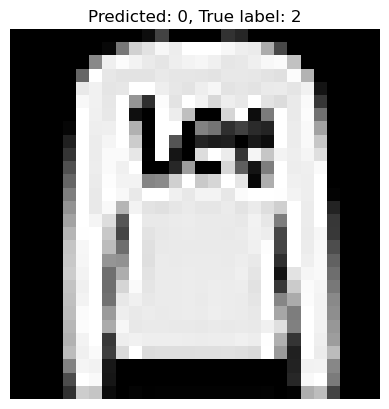

In [19]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Model

# Define the model class
class FashionMNISTModel(tf.keras.Model):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()

        # Modify convolutional layers and add padding to avoid dimension collapse
        self.conv1 = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')
        self.pool1 = MaxPooling2D(pool_size=(2,2), padding='same')  # Added padding here
        self.conv2 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')
        self.pool2 = MaxPooling2D(pool_size=(2,2), padding='same')  # Added padding here
        self.flatten = Flatten()
        self.fc1 = Dense(128, activation='relu')
        self.fc2 = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)  # Add pooling here
        x = self.flatten(x)
        x = self.fc1(x)
        return self.fc2(x)

# Instantiate the model
model = FashionMNISTModel()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming model is trained, now proceed with predictions for two test images
# Normalize the data
x_test = x_test.astype('float32') / 255.0  # Normalizing test data if not already done

# Make predictions for two random test images
predictions = model.predict(x_test[:2])  # Predictions for the first two test images
predicted_labels = np.argmax(predictions, axis=1)  # Get the predicted class labels

# Function to display the image and predicted label
def display_prediction(image, label, prediction):
    plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension
    plt.title(f"Predicted: {prediction}, True label: {label}")
    plt.axis('off')
    plt.show()

# Display the images and their predictions
for i in range(2):
    display_prediction(x_test[i], np.argmax(y_test[i]), predicted_labels[i])


In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Function to display the image and predicted label
def display_prediction(image, label, prediction):
    # Mapping class indices to labels
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    
    # Check if the prediction matches "Coat" or "Bag"
    if class_names[prediction] == 'Coat' or class_names[prediction] == 'Bag':
        plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension
        plt.title(f"Predicted: {class_names[prediction]}, True label: {class_names[label]}")
        plt.axis('off')
        plt.show()

# Ensure the input data shape is consistent with the model's requirements
# Normalize the test set data
x_test = x_test.astype('float32') / 255.0  # Normalizing test data if not already done

# Make predictions for two random test images
predictions = model.predict(x_test[:2])  # Predictions for the first two test images
predicted_labels = np.argmax(predictions, axis=1)  # Get the predicted class labels

# Display the images and their predictions only for "Coat" and "Bag"
for i in range(2):
    true_label = np.argmax(y_test[i])  # Get true label index from one-hot encoded vector
    display_prediction(x_test[i], true_label, predicted_labels[i])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 342ms/step


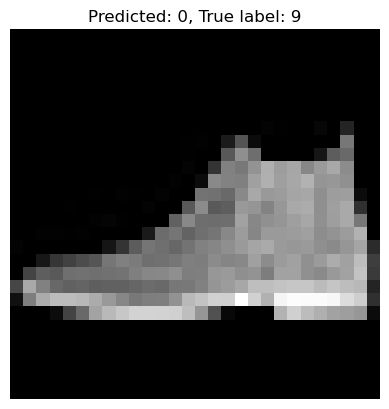

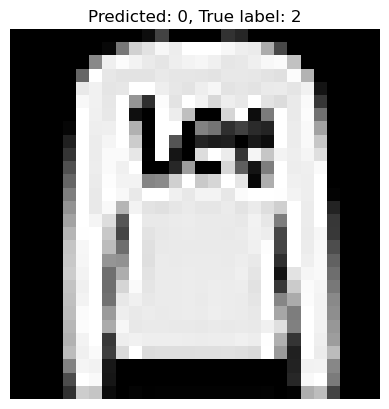

In [27]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Model

# Define the model class
class FashionMNISTModel(tf.keras.Model):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()

        # Modify convolutional layers and add padding to avoid dimension collapse
        self.conv1 = Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same')
        self.pool1 = MaxPooling2D(pool_size=(2,2), padding='same')  # Added padding here
        self.conv2 = Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')
        self.pool2 = MaxPooling2D(pool_size=(2,2), padding='same')  # Added padding here
        self.flatten = Flatten()
        self.fc1 = Dense(128, activation='relu')
        self.fc2 = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)  # Add pooling here
        x = self.flatten(x)
        x = self.fc1(x)
        return self.fc2(x)

# Instantiate the model
model = FashionMNISTModel()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Assuming model is trained, now proceed with predictions for two test images
# Normalize the data
x_test = x_test.astype('float32') / 255.0  # Normalizing test data if not already done

# Make predictions for two random test images
predictions = model.predict(x_test[:2])  # Predictions for the first two test images
predicted_labels = np.argmax(predictions, axis=1)  # Get the predicted class labels

# Function to display the image and predicted label
def display_prediction(image, label, prediction):
    plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension
    plt.title(f"Predicted: {prediction}, True label: {label}")
    plt.axis('off')
    plt.show()

# Display the images and their predictions
for i in range(2):
    display_prediction(x_test[i], np.argmax(y_test[i]), predicted_labels[i])


Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.7767 - loss: 0.6131
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 26ms/step - accuracy: 0.8939 - loss: 0.2951
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 25ms/step - accuracy: 0.9086 - loss: 0.2491
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 40s 24ms/step - accuracy: 0.9228 - loss: 0.2110
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9319 - loss: 0.1839
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step


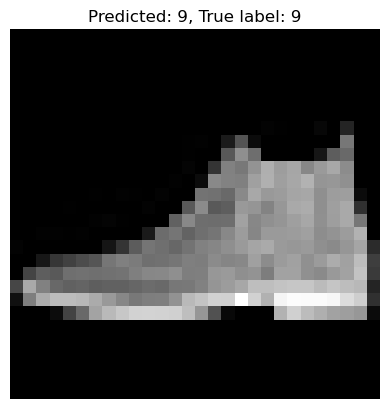

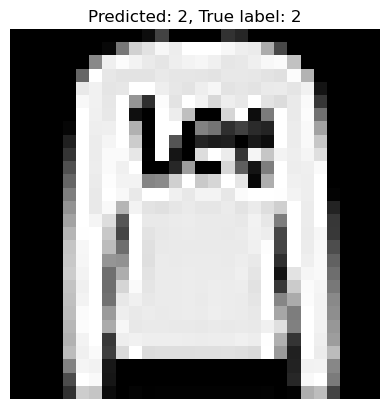

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras import Model
from tensorflow.keras.datasets import fashion_mnist

# Load and preprocess the data
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize and convert data to float32
x_train = x_train.astype('float32') / 255.0  # Normalize train data
x_test = x_test.astype('float32') / 255.0  # Normalize test data

# Add a channel dimension (28, 28) -> (28, 28, 1)
x_train = x_train[..., np.newaxis]
x_test = x_test[..., np.newaxis]

# One-hot encode labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

# Define the model class
class FashionMNISTModel(tf.keras.Model):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()

        # Modify convolutional layers and add padding to avoid dimension collapse
        self.conv1 = Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same')
        self.pool1 = MaxPooling2D(pool_size=(2, 2), padding='same')  # Added padding here
        self.conv2 = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')
        self.pool2 = MaxPooling2D(pool_size=(2, 2), padding='same')  # Added padding here
        self.flatten = Flatten()
        self.fc1 = Dense(128, activation='relu')
        self.fc2 = Dense(10, activation='softmax')

    def call(self, inputs):
        x = self.conv1(inputs)
        x = self.pool1(x)
        x = self.conv2(x)
        x = self.pool2(x)  # Add pooling here
        x = self.flatten(x)
        x = self.fc1(x)
        return self.fc2(x)

# Instantiate the model
model = FashionMNISTModel()

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=64)

# Make predictions for two random test images
predictions = model.predict(x_test[:2])  # Predictions for the first two test images
predicted_labels = np.argmax(predictions, axis=1)  # Get the predicted class labels

# Function to display the image and predicted label
def display_prediction(image, label, prediction):
    plt.imshow(image.squeeze(), cmap='gray')  # Squeeze to remove the channel dimension
    plt.title(f"Predicted: {prediction}, True label: {label}")
    plt.axis('off')
    plt.show()

# Display the images and their predictions
for i in range(2):
    display_prediction(x_test[i], np.argmax(y_test[i]), predicted_labels[i])
